<a href="https://colab.research.google.com/github/Lusiji254/Pneumothorax-Segmentation-using-DeepLab/blob/main/Data_preprocessing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Extracting the dataset
We load the data first from my google drive then we unzip the folder to extract the dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
%cd /content/gdrive/MyDrive/Pneumothorax/
!unzip /content/gdrive/MyDrive/Pneumothorax/png_masks.zip 

In [ ]:
!7za x  /content/gdrive/MyDrive/Pneumothorax/png_images.zip 

##Visualize the Dataset

In [ ]:
import torch 
import cv2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from tqdm import tqdm



In [ ]:
CSV_FILE = '/content/gdrive/MyDrive/Pneumothorax/stage_1_train_images.csv'


In [ ]:
df = pd.read_csv(CSV_FILE)
df.head()

,new_filename,ImageId,has_pneumo
0,0_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0
1,1_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0
2,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1
3,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
4,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1


In [ ]:
row = df.iloc[0]
image = row.new_filename
image_path = f'/content/gdrive/MyDrive/Pneumothorax/png_images/{image}'

mask_path = f'/content/gdrive/MyDrive/Pneumothorax/png_masks/{image}'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) /255.0 #so that the mask outputs as black and white

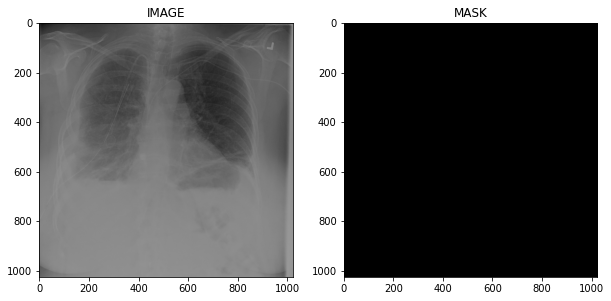

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
ax1.set_title('IMAGE')
ax1.imshow(image)

ax2.set_title('MASK')
ax2.imshow(mask,cmap = 'gray')

##Dividing the dataset into train and test folders based on csv files.

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

In [ ]:
labels = pd.read_csv(r'/content/gdrive/MyDrive/Pneumothorax/stage_1_train_images.csv')
labels.head()

,new_filename,ImageId,has_pneumo
0,0_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,0
1,1_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,0
2,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1
3,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
4,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1


In [ ]:
labels = pd.read_csv(r'/content/gdrive/MyDrive/Pneumothorax/stage_1_train_images.csv')

train_dir =r'/content/gdrive/MyDrive/Pneumothorax/png_images'
DR = r"/content/gdrive/MyDrive/Pneumothorax/train_images"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, image_id,class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename 
    dst_path = DR + str(class_name) + '/' + filename 
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [ ]:
import os
FOLDER_PATH = 'train_masks'
ROOT_PATH = '/content/gdrive/MyDrive/Pneumothorax/'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

10675


##Resampling my dataset to deal with the imbalance in classes
This is because the number of images with Pneumothorax(2379) are significantly less than those without. In this case I will Downsample to bring the number images without down to be equal to the number of images with.


In [ ]:
from sklearn.utils import resample


In [ ]:
# Separate majority and minority classes
df_majority = df[df.iloc[:,2]==0]
df_minority = df[df.iloc[:,2]==1]

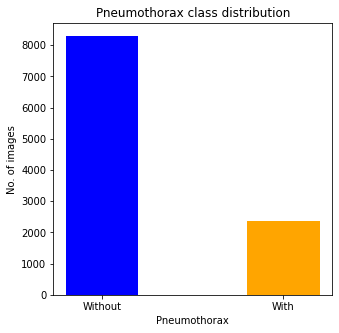

In [ ]:
data = {"Without":len(df_majority), "With":len(df_minority)}
classes = list(data.keys())
number_of_images = list(data.values())
color=["blue","orange"]
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(classes,number_of_images,color=color,width = 0.4)

 
plt.xlabel("Pneumothorax")
plt.ylabel("No. of images")
plt.title("Pneumothorax class distribution")
plt.show()

In [ ]:
df_majority.count()


new_filename    8296
ImageId         8296
has_pneumo      8296
dtype: int64

In [ ]:
df_minority.count()

new_filename    2379
ImageId         2379
has_pneumo      2379
dtype: int64

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=2379)

In [ ]:
df_majority_downsampled.count()

new_filename    2379
ImageId         2379
has_pneumo      2379
dtype: int64

In [ ]:
df_majority_downsampled.head()

,new_filename,ImageId,has_pneumo
2697,2697_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.4598.151787518...,0
3181,3181_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.11872.15178752...,0
9094,9094_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.11154.15178752...,0
6640,6640_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.1716.151787516...,0
4661,4661_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.4920.151787518...,0


In [ ]:
df_minority.count()


new_filename    2379
ImageId         2379
has_pneumo      2379
dtype: int64

In [ ]:
df_minority.head()

,new_filename,ImageId,has_pneumo
2,2_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,1
3,3_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,1
4,4_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1314.151787516...,1
7,7_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4440.151787518...,1
8,8_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.4982.151787518...,1


In [ ]:
import pandas as pd
downsampled_df = pd.concat([df_majority_downsampled,df_minority])
downsampled_df

,new_filename,ImageId,has_pneumo
8776,8776_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.2342.151787517...,0
7765,7765_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.5141.151787518...,0
5615,5615_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.10162.15178752...,0
10254,10254_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.14223.15178752...,0
6247,6247_train_0_.png,1.2.276.0.7230010.3.1.4.8323329.14120.15178752...,0
...,...,...,...
10665,10665_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.3335.151787517...,1
10666,10666_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.1805.151787516...,1
10667,10667_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32260.15178751...,1
10670,10670_train_1_.png,1.2.276.0.7230010.3.1.4.8323329.32459.15178751...,1


In [ ]:
downsampled_df.count()

new_filename    4758
ImageId         4758
has_pneumo      4758
dtype: int64

In [ ]:
downsampled_df.to_csv('/content/gdrive/MyDrive/Pneumothorax/downsampled_train.csv', index=False)

In [ ]:
idx =4000

row_d=downsampled_df.iloc[idx]
row_d


new_filename                                    2645_train_1_.png
ImageId         1.2.276.0.7230010.3.1.4.8323329.11489.15178752...
has_pneumo                                                      1
Name: 2645, dtype: object

In [ ]:
image_d = row_d.new_filename
image_d_path = f'/content/gdrive/MyDrive/Pneumothorax/png_images/{image_d}'

mask_d_path = f'/content/gdrive/MyDrive/Pneumothorax/png_masks/{image_d}'

image_d = cv2.imread(image_d_path)

image_d = cv2.cvtColor(image_d, cv2.COLOR_BGR2RGB)

mask_d = cv2.imread(mask_d_path, cv2.IMREAD_GRAYSCALE) /255.0

In [ ]:
image_d_path, mask_d_path

('/content/gdrive/MyDrive/Pneumothorax/png_images/2645_train_1_.png',
 '/content/gdrive/MyDrive/Pneumothorax/png_masks/2645_train_1_.png')

In [ ]:
image_d.shape


(1024, 1024, 3)

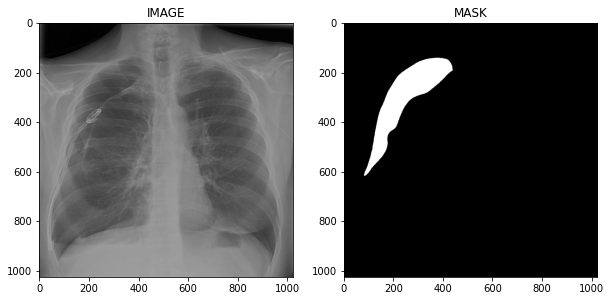

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
ax1.set_title('IMAGE')
ax1.imshow(image_d)

ax2.set_title('MASK')
ax2.imshow(mask_d,cmap = 'gray')

In [ ]:
mask_d.shape
# we will do np.expand_dims to add the extra 1 at the end of the shape

(1024, 1024)

In [ ]:
labels = pd.read_csv(r'/content/gdrive/MyDrive/Pneumothorax/downsampled_train.csv')

train_dir =r'/content/gdrive/MyDrive/Pneumothorax/png_images'
DR = r"/content/gdrive/MyDrive/Pneumothorax/downsampled_train_images"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, image_id,class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename 
    dst_path = DR + str(class_name) + '/' + filename 
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))